<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

## Введение

**XGBoost** (Extreme Gradient Boosting) — это алгоритм машинного обучения, основанный на методе градиентного бустинга, который зарекомендовал себя как один из самых мощных инструментов для решения задач регрессии и классификации. Он эффективен, гибок и может работать с большими наборами данных. В этой лекции мы рассмотрим основные аспекты XGBoost, включая его математические основы, вычисление градиента, функции потерь, метрики качества и применение.

## 1. Основы градиентного бустинга

Градиентный бустинг — это метод ансамблевого обучения, где много слабых моделей (обычно деревьев решений) комбинируются для создания более сильной модели. Основная идея заключается в следующем:

1. **Инициализация**: Начинаем с простой модели, которая предсказывает среднее значение целевой переменной.
   $$
   F_0(x) = \arg \min_{c} \sum_{i=1}^n L(y_i, c)
   $$

2. **Итеративное добавление деревьев**: На каждой итерации $m$ мы добавляем новое дерево $h_m(x)$, обученное на остатках текущих предсказаний.

   Обновление модели происходит по формуле:
   $$
   F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)
   $$
   где $\eta$ — скорость обучения (learning rate).

3. **Цель обучения**: Минимизация функции потерь, определяющей качество предсказаний модели.

## 2. Математика XGBoost

### 2.1. Функции потерь

Функции потерь — это ключевые компоненты XGBoost, которые определяют, насколько хорошо модель предсказывает целевую переменную. Различают функции потерь для регрессии и классификации.

#### 2.1.1. Регрессия

1. **Среднеквадратичная ошибка (Mean Squared Error, MSE)**:
   $$
   L(y, F(x)) = \frac{1}{n} \sum_{i=1}^n (y_i - F(x_i))^2
   $$

2. **Средняя абсолютная ошибка (Mean Absolute Error, MAE)**:
   $$
   L(y, F(x)) = \frac{1}{n} \sum_{i=1}^n |y_i - F(x_i)|
   $$

3. **Huber loss**:
   $$
   L(y, F(x)) =
   \begin{cases}
   \frac{1}{2}(y_i - F(x_i))^2, & \text{если } |y_i - F(x_i)| \leq \delta \\
   \delta \cdot (|y_i - F(x_i)| - \frac{1}{2} \delta), & \text{иначе}
   \end{cases}
   $$

#### 2.1.2. Классификация

1. **Бинарная кросс-энтропия (Log Loss)**:
   $$
   L(y, F(x)) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
   $$
   где $p_i = \sigma(F(x_i))$, а $\sigma(z) = \frac{1}{1 + e^{-z}}$ — сигмоидная функция.

2. **Многоклассовая кросс-энтропия**:
   $$
   L(y, F(x)) = -\frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K y_{ik} \log(p_{ik})
   $$
   где $y_{ik}$ — это индикатор, что $i$-й пример относится к классу $k$.

### 2.2. Вычисление градиента

Градиент — это первая производная функции потерь по предсказанному значению:
$$
g_i = \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}
$$
Градиенты показывают, как необходимо изменять предсказания для уменьшения ошибки.

#### Примеры градиентов:

1. **Для MSE**:
   $$
   g_i = -2(y_i - F(x_i))
   $$

2. **Для MAE**:
   $$
   g_i = \text{sgn}(F(x_i) - y_i)
   $$

3. **Для бинарной кросс-энтропии**:
   $$
   g_i = p_i - y_i
   $$

### 2.3. Вычисление гессиана

Гессиан — это вторая производная функции потерь:
$$
h_i = \frac{\partial^2 L(y_i, F(x_i))}{\partial F(x_i)^2}
$$
Гессиан используется для уточнения обновления модели, обеспечивая более стабильное обучение.

#### Примеры гессианов:

1. **Для MSE**:
   $$
   h_i = 2
   $$

2. **Для MAE**:
   $$
   h_i \text{ отсутствует}
   $$

3. **Для бинарной кросс-энтропии**:
   $$
   h_i = p_i(1 - p_i)
   $$

### 2.4. Регуляризация

Регуляризация помогает предотвратить переобучение модели, добавляя штрафы на сложность модели. В XGBoost это достигается за счет добавления членов регуляризации к функции потерь:
$$
L(F) = \sum_{i=1}^n L(y_i, F(x_i)) + \sum_{j=1}^m \Omega(h_j)
$$
где $\Omega(h) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2$.

### Параметры регуляризации:
- $T$ — количество листьев в дереве,
- $w_j$ — веса (значения) каждого листа,
- $\gamma$ и $\lambda$ — параметры регуляризации, которые контролируют степень сложности модели.



## 3. Обучение модели XGBoost

### 3.1. Процесс обучения

1. **Инициализация**: Начинаем с предсказания константы $F_0(x)$.

2. **Цикл обучения**:
   - На каждой итерации $m$ вычисляем градиенты $g_i$ и гессианы $h_i$ для каждого примера.
   - Обучаем новое дерево $h_m(x)$ на основе градиентов.
   - Обновляем предсказание:
     $$
     F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)
     $$

### 3.2. Обновление предсказаний

Обновление происходит путем добавления нового дерева, которое минимизирует функцию потерь, используя градиенты и гессианы, рассчитанные на предыдущем шаге.



## 4. Метрики качества

### 4.1. Метрики для регрессии

1. **Среднеквадратичная ошибка (MSE)**:
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - F(x_i))^2
   $$

2. **Средняя абсолютная ошибка (MAE)**:
   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - F(x_i)|
   $$

3. **R² (коэффициент детерминации)**:
   $$
   R^2 = 1 - \frac{\sum_{i=1}^n (y_i - F(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
   $$
   где $\bar{y}$ — среднее значение целевой переменной.

### 4.2. Метрики для классификации

1. **Точность (Accuracy)**:
   $$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{n}
   $$
   где TP — истинно положительные, TN — истинно отрицательные.

2. **Полнота (Recall)**:
   $$
   \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
   $$
   где FN — ложно отрицательные.

3. **Точность (Precision)**:
   $$
   \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
   $$
   где FP — ложно положительные.

4. **F1-Score**:
   $$
   F

1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$



## 5. Применение XGBoost

### 5.1. Примеры применения

- **Классификация**: распознавание изображений, анализ тональности текста, медицинская диагностика.
- **Регрессия**: прогнозирование цен, предсказание спроса, финансовый анализ.

### 5.2. Настройка модели

Чтобы достичь максимальной производительности модели XGBoost, необходимо правильно настроить гиперпараметры, такие как:
- **Количество деревьев**: `n_estimators`
- **Скорость обучения**: `learning_rate`
- **Максимальная глубина деревьев**: `max_depth`
- **Минимальная сумма весов в листьях**: `min_child_weight`
- **Регуляризация**: `alpha` и `lambda`



## Заключение

XGBoost является мощным инструментом для решения задач машинного обучения благодаря своей гибкости и эффективности. Он использует концепции градиентного бустинга, что позволяет модели постепенно улучшать свои предсказания за счет вычисления градиентов и гессианов функции потерь. Понимание математических основ XGBoost поможет глубже оценить его возможности и успешно применять в реальных задачах.



Давайте рассмотрим конкретный числовой пример задачи классификации, используя XGBoost. Мы будем использовать бинарную классификацию, где целью является предсказать, принадлежит ли наблюдение к классу 0 или классу 1.

### Задача

Предположим, у нас есть следующая выборка с двумя признаками (features) и целевой переменной (label):

| Признак 1 (X1) | Признак 2 (X2) | Целевая переменная (Y) |
|-|-|-|
| 2.5            | 1.0            | 0                       |
| 1.5            | 2.0            | 0                       |
| 3.5            | 2.0            | 1                       |
| 5.0            | 4.0            | 1                       |
| 4.0            | 3.0            | 1                       |
| 2.0            | 3.0            | 0                       |

### Шаг 1: Инициализация

Начнем с инициализации предсказаний. Мы предполагаем, что предсказания модели изначально равны среднему значению целевой переменной. В данном случае:
$$
F_0(x) = \frac{1}{n} \sum_{i=1}^n y_i = \frac{0 + 0 + 1 + 1 + 1 + 0}{6} = \frac{3}{6} = 0.5
$$

### Шаг 2: Вычисление функции потерь и градиентов

Предположим, что мы используем **бинарную кросс-энтропию** в качестве функции потерь. Формула для этой функции:
$$
L(y, p) = -\left( y \log(p) + (1 - y) \log(1 - p) \right)
$$
где $p$ — это предсказанная вероятность принадлежности к классу 1, полученная через сигмоидную функцию:
$$
p = \sigma(F(x)) = \frac{1}{1 + e^{-F(x)}}
$$

### Шаг 3: Вычисление градиента и гессиана

Для первого примера, $y_1 = 0$:
- Предсказание:
$$
p_1 = \sigma(F_0(x_1)) = \sigma(0.5) = \frac{1}{1 + e^{-0.5}} \approx 0.6225
$$
- Функция потерь:
$$
L(y_1, p_1) = -\left(0 \log(0.6225) + 1 \log(1 - 0.6225)\right) = -\log(0.3775) \approx 0.974
$$
- Градиент:
$$
g_1 = p_1 - y_1 = 0.6225 - 0 = 0.6225
$$
- Гессиан:
$$
h_1 = p_1 (1 - p_1) = 0.6225 \cdot (1 - 0.6225) \approx 0.2351
$$

### Шаг 4: Повторение для всех примеров

Повторяем шаги 2 и 3 для всех примеров:

#### Пример 2: $y_2 = 0$

- Предсказание:
$$
p_2 = \sigma(F_0(x_2)) = \sigma(0.5) \approx 0.6225
$$
- Функция потерь:
$$
L(y_2, p_2) \approx 0.974
$$
- Градиент:
$$
g_2 = p_2 - y_2 = 0.6225 - 0 = 0.6225
$$
- Гессиан:
$$
h_2 \approx 0.2351
$$

#### Пример 3: $y_3 = 1$

- Предсказание:
$$
p_3 = \sigma(F_0(x_3)) \approx 0.6225
$$
- Функция потерь:
$$
L(y_3, p_3) = -\left(1 \log(0.6225) + 0 \log(1 - 0.6225)\right) = -\log(0.6225) \approx 0.474
$$
- Градиент:
$$
g_3 = p_3 - y_3 = 0.6225 - 1 = -0.3775
$$
- Гессиан:
$$
h_3 \approx 0.2351
$$

#### Пример 4: $y_4 = 1$

- Предсказание:
$$
p_4 \approx 0.6225
$$
- Функция потерь:
$$
L(y_4, p_4) \approx 0.474
$$
- Градиент:
$$
g_4 = p_4 - y_4 = 0.6225 - 1 = -0.3775
$$
- Гессиан:
$$
h_4 \approx 0.2351
$$

#### Пример 5: $y_5 = 1$

- Предсказание:
$$
p_5 \approx 0.6225
$$
- Функция потерь:
$$
L(y_5, p_5) \approx 0.474
$$
- Градиент:
$$
g_5 = p_5 - y_5 = 0.6225 - 1 = -0.3775
$$
- Гессиан:
$$
h_5 \approx 0.2351
$$

#### Пример 6: $y_6 = 0$

- Предсказание:
$$
p_6 \approx 0.6225
$$
- Функция потерь:
$$
L(y_6, p_6) \approx 0.974
$$
- Градиент:
$$
g_6 = p_6 - y_6 = 0.6225 - 0 = 0.6225
$$
- Гессиан:
$$
h_6 \approx 0.2351
$$

### Шаг 5: Обучение нового дерева

Теперь, имея градиенты и гессианы для каждого примера, мы можем обучить новое дерево $h_1(x)$ на основе этих значений. Мы будем использовать алгоритм построения дерева, который минимизирует функцию потерь с учетом градиентов и гессианов.

### Шаг 6: Обновление предсказаний

Обновляем предсказания модели:
$$
F_1(x) = F_0(x) + \eta \cdot h_1(x)
$$
где $\eta$ — скорость обучения. Допустим, что мы выбрали $\eta = 0.1$.

### Пример обновления

Предположим, что после обучения нового дерева, мы получили:
- Для первого примера $h_1(x_1) = 0.3$

Обновим предсказание для первого примера:
$$
F_1(x_1) = 0.5 + 0.1 \cdot 0.3 = 0.53
$$
Теперь вычислим новую вероятность:
$$
p_1^{new} = \sigma(F_1(x_1)) = \frac{1}{1 + e^{-0.53}} \approx 0.629
$$

### Шаг 7: Повторение шагов

Процесс повторяется. Мы будем вычислять новые градиенты и гессианы, обучать следующее дерево и обновлять предсказания. Это будет продолжаться до тех пор, пока не будет достигнуто заранее определенное количество итераций или пока не будет достигнута желаемая точность.

### Заключение

Мы рассмотрели пример, который иллюстрирует, как работает алгоритм XGBoost для задачи бинарной классификации. Процесс включает инициализацию, вычисление градиентов и гессианов, обучение деревьев и обновление предсказаний. Повторяя эти шаги, XGBoost может эффективно улучшать качество своих предсказаний.


Давайте рассмотрим числовой пример задачи регрессии с использованием алгоритма XGBoost. В этом примере мы будем предсказывать значение целевой переменной (Y) на основе двух признаков (X1 и X2).

### Задача

Предположим, у нас есть следующая выборка с двумя признаками и целевой переменной:

| Признак 1 (X1) | Признак 2 (X2) | Целевая переменная (Y) |
|-|-|-|
| 1.0            | 2.0            | 2.0                     |
| 1.5            | 1.8            | 1.8                     |
| 2.0            | 3.0            | 3.0                     |
| 3.0            | 2.5            | 4.0                     |
| 3.5            | 3.0            | 4.5                     |
| 4.0            | 4.0            | 5.0                     |

### Шаг 1: Инициализация

Начинаем с инициализации предсказаний. В качестве первого предсказания мы возьмем среднее значение целевой переменной Y:
$$
F_0(x) = \frac{1}{n} \sum_{i=1}^n y_i = \frac{2.0 + 1.8 + 3.0 + 4.0 + 4.5 + 5.0}{6} = \frac{20.3}{6} \approx 3.383
$$

### Шаг 2: Вычисление функции потерь и градиентов

Мы будем использовать **среднеквадратичную ошибку (MSE)** в качестве функции потерь, которая определяется как:
$$
L(y, F(x)) = \frac{1}{n} \sum_{i=1}^n (y_i - F(x_i))^2
$$

Для каждого примера мы вычислим градиент и гессиан. Градиенты и гессианы вычисляются следующим образом:

- Градиент:
$$
g_i = \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} = -2(y_i - F(x_i))
$$
- Гессиан:
$$
h_i = \frac{\partial^2 L(y_i, F(x_i))}{\partial F(x_i)^2} = 2
$$

### Шаг 3: Вычисление градиентов и гессианов для каждого примера

Теперь мы будем вычислять градиенты и гессианы для каждого примера:

#### Пример 1: $y_1 = 2.0$

- Предсказание:
$$
F_0(x_1) \approx 3.383
$$
- Функция потерь:
$$
L(y_1, F_0(x_1)) = (2.0 - 3.383)^2 \approx 1.903
$$
- Градиент:
$$
g_1 = -2(2.0 - 3.383) = -2(-1.383) \approx 2.766
$$
- Гессиан:
$$
h_1 = 2
$$

#### Пример 2: $y_2 = 1.8$

- Предсказание:
$$
F_0(x_2) \approx 3.383
$$
- Функция потерь:
$$
L(y_2, F_0(x_2)) = (1.8 - 3.383)^2 \approx 2.513
$$
- Градиент:
$$
g_2 = -2(1.8 - 3.383) = -2(-1.583) \approx 3.166
$$
- Гессиан:
$$
h_2 = 2
$$

#### Пример 3: $y_3 = 3.0$

- Предсказание:
$$
F_0(x_3) \approx 3.383
$$
- Функция потерь:
$$
L(y_3, F_0(x_3)) = (3.0 - 3.383)^2 \approx 0.147
$$
- Градиент:
$$
g_3 = -2(3.0 - 3.383) = -2(-0.383) \approx 0.766
$$
- Гессиан:
$$
h_3 = 2
$$

#### Пример 4: $y_4 = 4.0$

- Предсказание:
$$
F_0(x_4) \approx 3.383
$$
- Функция потерь:
$$
L(y_4, F_0(x_4)) = (4.0 - 3.383)^2 \approx 0.384
$$
- Градиент:
$$
g_4 = -2(4.0 - 3.383) = -2(0.617) \approx -1.234
$$
- Гессиан:
$$
h_4 = 2
$$

#### Пример 5: $y_5 = 4.5$

- Предсказание:
$$
F_0(x_5) \approx 3.383
$$
- Функция потерь:
$$
L(y_5, F_0(x_5)) = (4.5 - 3.383)^2 \approx 1.258
$$
- Градиент:
$$
g_5 = -2(4.5 - 3.383) = -2(1.117) \approx -2.234
$$
- Гессиан:
$$
h_5 = 2
$$

#### Пример 6: $y_6 = 5.0$

- Предсказание:
$$
F_0(x_6) \approx 3.383
$$
- Функция потерь:
$$
L(y_6, F_0(x_6)) = (5.0 - 3.383)^2 \approx 2.627
$$
- Градиент:
$$
g_6 = -2(5.0 - 3.383) = -2(1.617) \approx -3.234
$$
- Гессиан:
$$
h_6 = 2
$$

### Шаг 4: Обучение нового дерева

Теперь мы имеем градиенты и гессианы для всех примеров. Используя их, мы можем обучить новое дерево $h_1(x)$.

Предположим, что после обучения нового дерева мы получили следующее предсказание для первого примера $h_1(x_1) = 0.5$.

### Шаг 5: Обновление предсказаний

Обновляем предсказания модели с учетом скорости обучения $\eta$. Предположим, что мы выбрали $\eta = 0.1$.

Для первого примера:
$$
F_1(x_1) = F_0(x_1) + \eta \cdot h_1(x_1) = 3.383 + 0.1 \cdot 0.5 = 3.433
$$

Теперь вычислим новую функцию потерь:
$$
L(y_1, F_1(x_1)) = (2.0 - 3.433)^2 \approx 2.046
$$

### Шаг 6: Повторение шагов

Процесс повторяется. Мы снова будем вычислять новые градиенты и гессианы, обучать следующее дерево $h_2(x)$ и обновлять предсказания. Это будет продолжаться до тех пор, пока не будет достигнуто заранее определенное количество итераций или пока не будет достигнута желаемая точность.

### Заключение

Мы рассмотрели пример, который иллюстрирует, как работает алгоритм XGBoost для задачи регрессии. Процесс включает инициализацию, вычисление градиентов и гессианов, обучение деревьев и обновление предсказаний. Повторяя эти шаги, XGBoost может эффективно улучшать качество своих предсказаний.

### Задача 1: Регрессия
Для задачи регрессии мы будем использовать синтетические данные для предсказания целевой переменной на основе двух признаков.

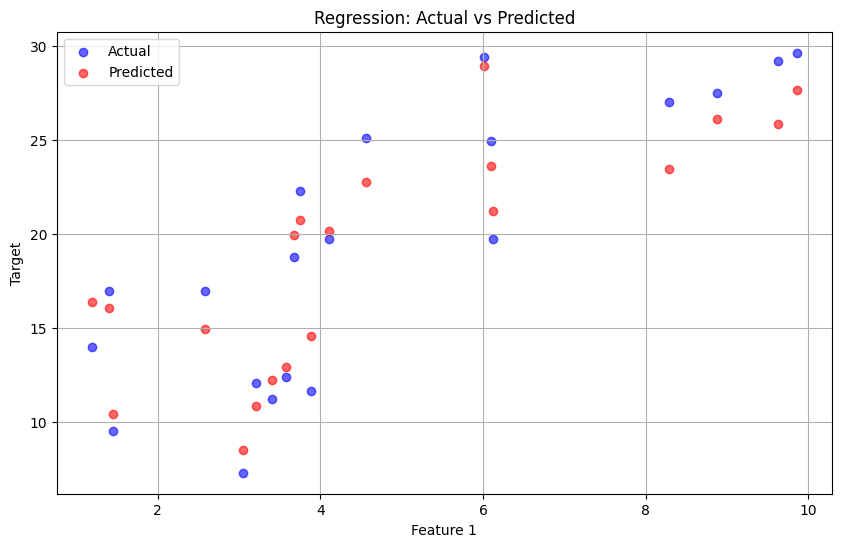

Mean Squared Error: 3.41
R^2 Score: 0.93


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Установка начального значения для воспроизводимости
np.random.seed(42)

# 1. Создание синтетических данных
X = np.random.rand(100, 2) * 10  # 100 образцов, 2 признака
y = 2.5 * X[:, 0] + 1.5 * X[:, 1] + np.random.randn(100) * 2  # Целевая переменная с шумом

# Создание DataFrame
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Target'] = y

# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data[['Feature 1', 'Feature 2']], data['Target'], test_size=0.2, random_state=42)

# Обучение модели
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# 3. Предсказание и визуализация
y_pred = model.predict(X_test)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Feature 1'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['Feature 1'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Regression: Actual vs Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# 4. Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

### Задача 2: Классификация
Теперь перейдем к задаче классификации. Мы будем использовать синтетические данные для предсказания классов на основе двух признаков.

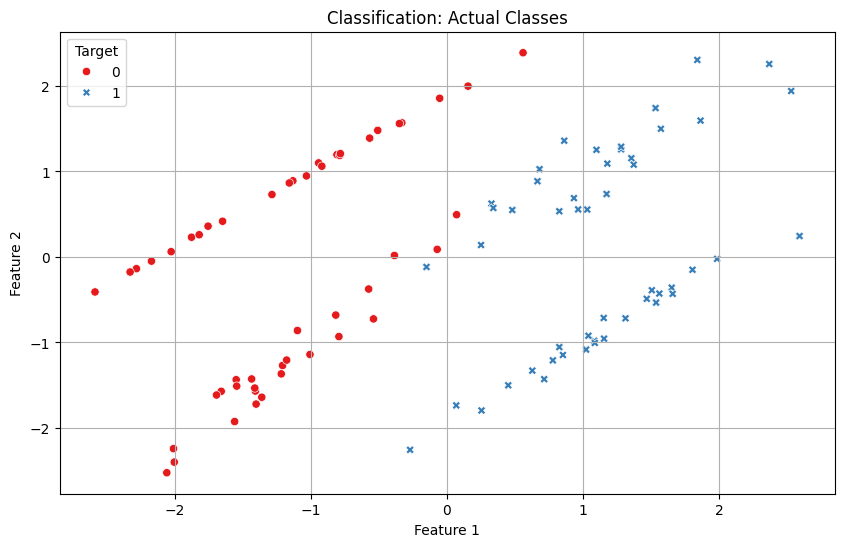

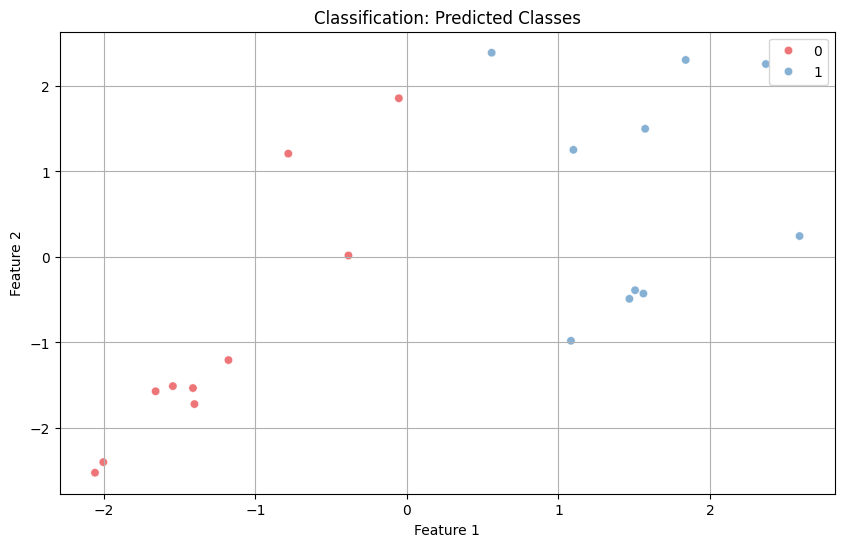

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
[[10  1]
 [ 0  9]]


In [2]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Создание синтетических данных для классификации
X_class, y_class = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Создание DataFrame
data_class = pd.DataFrame(X_class, columns=['Feature 1', 'Feature 2'])
data_class['Target'] = y_class

# 2. Разделение данных на обучающую и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(data_class[['Feature 1', 'Feature 2']], data_class['Target'], test_size=0.2, random_state=42)

# Обучение модели
model_class = GradientBoostingClassifier()
model_class.fit(X_train_class, y_train_class)

# 3. Предсказание и визуализация
y_pred_class = model_class.predict(X_test_class)

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_class, x='Feature 1', y='Feature 2', hue='Target', style='Target', palette='Set1')
plt.title('Classification: Actual Classes')
plt.grid()
plt.show()

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_class['Feature 1'], y=X_test_class['Feature 2'], hue=y_pred_class, palette='Set1', alpha=0.6)
plt.title('Classification: Predicted Classes')
plt.grid()
plt.show()

# 4. Вычисление метрик
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test_class, y_pred_class))
print('Confusion Matrix:')
print(confusion_matrix(y_test_class, y_pred_class))